In [42]:
%load_ext autoreload
%autoreload 2

from __future__ import absolute_import

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.style.use('classic')

import data_preparing as dp
import validation as vd

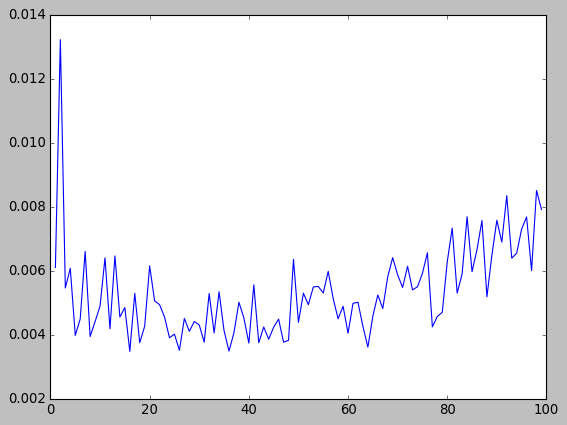

In [107]:
part_size = 450

dataset = np.vstack([
    np.hstack([dp.get_normal_distributed_features(2,5,6,10, part_size), np.full((part_size,1),0)]),
    np.hstack([dp.get_normal_distributed_features(3,6,2,7,  part_size), np.full((part_size,1),1)]),
])

nnmodel = dp.NNmodel()

irange = np.arange(1, 100, 1)

results = np.zeros(len(irange))

k=0
for i in irange:
    print(k/len(irange)*100,"%",end='\r')
    cv = vd.CrossValidation(dp.KNNmodel(i), 100, 0.8)
    results[k] = cv.calculate(dataset[:, :2], dataset[:, 2])
    k=k+1


plt.plot(irange, results);
plt.show();

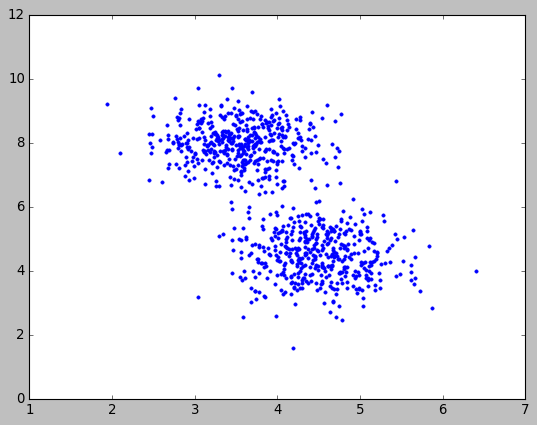

In [85]:
plt.plot(dataset[:,0],dataset[:,1],".");
plt.show()